In [23]:
%run moon_code

In [28]:
raw_data = load_raw_data('raw_data_20180824.pickle')
kospi200, name_dict, code_dict = load_code_name_data("./data/data.csv", True)
party_df = load_party_data('party_df.csv')

In [48]:
import datetime

In [52]:
data = pd.DataFrame()
for key, df in raw_data.items():
    a = df.copy()
    a['Date'] = pd.to_datetime(a.index)
    a.index = range(len(a))
    a['stockName'] = code_dict[key]
    a['stockCode'] = key
    data = pd.concat((data,a))
    del a

In [53]:
data = data[['stockName','stockCode','Date','Open','High','Low','Volume']]

In [60]:
# from pandas_datareader import data as pdr
# import fix_yahoo_finance as yf
# yf.pdr_override()
# ks11 = pdr.get_data_yahoo("^KS11", start="2000-01-01", end="2018-08-01")

ks11 = pd.read_csv('^ks11.csv')

In [132]:
del_li = [code_dict[key] for key, df in raw_data.items() if len(df) < 252*2]
del_li2 = ['BGF', 'HDC', 'SK디스커버리', '대우조선해양', '대한항공', '동아쏘시오홀딩스', '동양', '롯데지주', '오리온홀딩스', '우리은행', '쿠쿠홀딩스', '팬오션', '한국타이어월드와이드', '한라홀딩스', '현대중공업', '효성'] 

In [139]:
for stockName in set(del_li + del_li2):
    del raw_data[name_dict[stockName]]

In [140]:
len(raw_data)

177

In [204]:
raw_data['005930'].index[0]

Timestamp('2000-01-04 00:00:00')

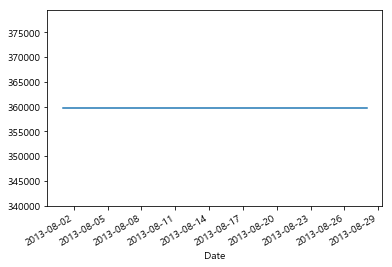

In [178]:
df.Close.loc['2013-08-01':'2013-08-28'].plot()

In [175]:
df = raw_data[name_dict['NAVER']].loc['2012-01-01':]
df[df.Volume==0]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-07-30,525260.0,525260.0,525260.0,525260.0,521631.96875,0
2013-07-31,525260.0,525260.0,525260.0,525260.0,521631.96875,0
2013-08-01,359750.0,359750.0,359750.0,359750.0,357265.15625,0
2013-08-02,359750.0,359750.0,359750.0,359750.0,357265.15625,0
2013-08-05,359750.0,359750.0,359750.0,359750.0,357265.15625,0
2013-08-06,359750.0,359750.0,359750.0,359750.0,357265.15625,0
2013-08-07,359750.0,359750.0,359750.0,359750.0,357265.15625,0
2013-08-08,359750.0,359750.0,359750.0,359750.0,357265.15625,0
2013-08-09,359750.0,359750.0,359750.0,359750.0,357265.15625,0


In [164]:
from collections import defaultdict
d = defaultdict(int)
for key, df in raw_data.items():
    a = df.loc['2012-01-01':].copy()
    for date in a[a.Volume == 0].index:
        d[date] += 1

In [124]:
raw_data[name_dict['NAVER']].loc['2017-09-24':'2017-09-27']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-09-25,760000.0,763000.0,749000.0,754000.0,752752.5625,73864
2017-09-26,754000.0,754000.0,754000.0,754000.0,752752.5625,0
2017-09-27,750000.0,752000.0,734000.0,734000.0,732785.6250,92054


In [181]:
data = pd.DataFrame()
for key, df in raw_data.items():
    a = df.copy()
    a['Date'] = pd.to_datetime(a.index)
    a.index = range(len(a))
    a['stockName'] = code_dict[key]
    a['stockCode'] = key
    data = pd.concat((data,a))
    del a
data = data[['stockName','stockCode','Date','Open','High','Low','Volume']]

In [188]:
def dict_test():
    a=0
    for key in raw_data.keys():
        a+=1
def panel_test():
    a=0
    for code in data.stockCode.unique():
        a+=1

In [191]:
%timeit dict_test()

5.93 µs ± 89.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [192]:
%timeit panel_test()

18.7 ms ± 135 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
